# **Waste Detection and Classification using Detectron2** 
<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="250" align="center">

## Introduction
  Modern waste management is well known to all, but unfortunately neglected by many who practice waste segregation to address the problems caused by improper waste disposal. Illegal dumping is an ongoing problem in many urban communities around the world. Odours and pollutants caused by abandoned household items, dumped garbage and construction debris are ruining cities and threatening the well-being of citizens. To curb illegal dumping, some urban areas are planning network-based voluntary reporting systems and security camera-based monitoring systems. However, these methods require manual observation and detection, are vulnerable to false alarms, and are costly. Garbage is a global problem that affects all living things.

  To automate the recycling process, it is important to propose a smart framework that enables effective waste sorting. Due to the large number of objects detected in a limited amount of time, the use of object detection software in waste sorting is a worthwhile practice as opposed to traditional recycling strategies. Traditional approaches rely on human labour and tend to fail to separate waste for recycling. The Deep Learning techniques have been effectively applied in a variety of areas, including, medical imaging, autonomous driving, and many industrial environments. It gives amazing results in object identification problems. Applying these technologies to waste sorting can increase the amount of recycled materials, make everyday life more convenient for ordinary people and make industries more efficient.

  Thus, this project is aimed at planning and developing up a framework with a deep learning approach that can be effectively used for waste segregation. The image will be recognized by utilizing the concept of a convolutional neural network and with the help of the state-of-the-art object detection algorithms that identifies wastes from their shape, colour, dimension, and size. This technique automatically will help the system to learn the pertinent features from the sample images of the trash and consequently recognize those features in new images. By using the strategy of convolutional neural networks, garbage will be classified into different classes. The strategy utilized for this characterization is with the assistance of PyTorch and Mask R-CNN technique. <strong>Through this technique, bounding boxes segmentation masks are made on the recyclable waste demonstrating which of the 60 different classes, the waste falls into.</strong> <mark>The main objective of this study is to develop software to detect types of recyclable materials in trash bins and check for possible contamination (non-recyclable materials), which would ultimately reduce human effort in waste segregation and expedite the entire process.</mark>

----
## Motivation
  Although many machines and robots that can segregate different types of bulk wastes in large scale garbage depots, but in the roads, streets, beaches, lakes and ponds side wastes can't be easily detected and classified properly. So our designed waste detection system can easily detect and classify and help the world clean and green. 

----

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/MiniProject/

/content/drive/.shortcut-targets-by-id/17XKj9_ZGyxnjQmaMIUba_2WT05dHYvfh/MiniProjectOld


In [ ]:
!git clone https://github.com/pedropro/TACO.git
%cd TACO

Cloning into 'TACO'...
remote: Enumerating objects: 700, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 700 (delta 87), reused 95 (delta 63), pack-reused 580
Receiving objects: 100% (700/700), 95.59 MiB | 13.31 MiB/s, done.
Resolving deltas: 100% (464/464), done.
Checking out files: 100% (25/25), done.
/content/drive/.shortcut-targets-by-id/17XKj9_ZGyxnjQmaMIUba_2WT05dHYvfh/MiniProjectOld/TACO


In [ ]:
!pip install -r requirements.txt

In [ ]:
!python download.py

Note. If for any reason the connection is broken. Just call me again and I will start where I left.
Finished


In [ ]:
%cd content/drive/MyDrive/MiniProjectOld/TACO/detector/
!python split_dataset.py --dataset_dir ../data

In [ ]:
%cd /content/drive/MyDrive/Mini_Project/
!git clone https://github.com/facebookresearch/detectron2.git

/content/drive/MyDrive/Mini_Project
Cloning into 'detectron2'...
remote: Enumerating objects: 14641, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 14641 (delta 19), reused 37 (delta 11), pack-reused 14584
Receiving objects: 100% (14641/14641), 6.00 MiB | 5.52 MiB/s, done.
Resolving deltas: 100% (10575/10575), done.
Checking out files: 100% (819/819), done.


In [4]:
import os
import json
import glob as glob
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

SEED = 42
np.random.seed(SEED)

import warnings
warnings.filterwarnings('ignore')

In [6]:
dataset_path = '/content/drive/MyDrive/MiniProject/TACO_original/data'
anns_file_path = dataset_path + '/' + 'annotations.json'

# Read annotations
with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

# Load categories and super categories
cat_names = []
super_cat_names = []
super_cat_ids = {}
super_cat_last_name = ''
nr_super_cats = 0
for cat_it in categories:
    cat_names.append(cat_it['name'])
    super_cat_name = cat_it['supercategory']
    # Adding new supercat
    if super_cat_name != super_cat_last_name:
        super_cat_names.append(super_cat_name)
        super_cat_ids[super_cat_name] = nr_super_cats
        super_cat_last_name = super_cat_name
        nr_super_cats += 1

print('Number of super categories:', nr_super_cats)
print('Number of categories:', nr_cats)
print('Number of annotations:', nr_annotations)
print('Number of images:', nr_images)

Number of super categories: 28
Number of categories: 60
Number of annotations: 4784
Number of images: 1500


## 1. Dataset Statistics

This shows the number of annotations per category:

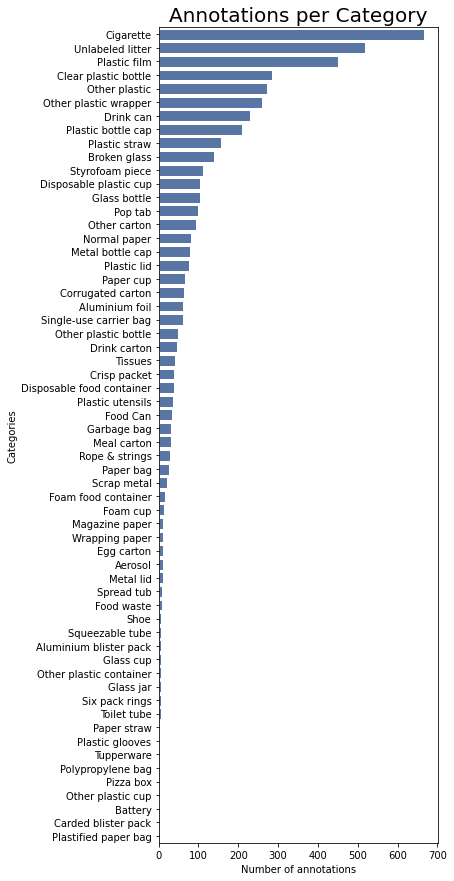

In [7]:
# Count annotations
cat_histogram = np.zeros(nr_cats,dtype=int)
for ann in anns:
    cat_histogram[ann['category_id']] += 1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,15))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

# Plot the Categories
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b", orient="h")
plt.title("Annotations per Category",loc='center',y=1,fontdict={'fontsize':20});
plt.show();

# fig = plot_1.get_figure()
# fig.savefig("output.png")

and this shows the number of annotations per super category:

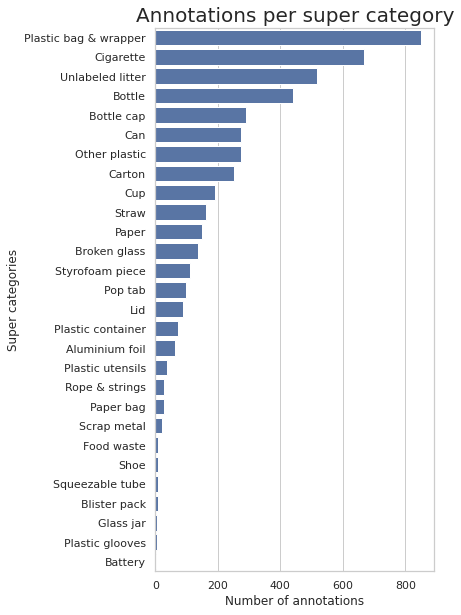

In [8]:
cat_ids_2_supercat_ids = {}
for cat in categories:
    cat_ids_2_supercat_ids[cat['id']] = super_cat_ids[cat['supercategory']]

# Count annotations
super_cat_histogram = np.zeros(nr_super_cats,dtype=int)
for ann in anns:
    cat_id = ann['category_id']
    super_cat_histogram[cat_ids_2_supercat_ids[cat_id]] +=1
    
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,10))

# Convert to DataFrame
d ={'Super categories': super_cat_names, 'Number of annotations': super_cat_histogram}
df = pd.DataFrame(d)
df = df.sort_values('Number of annotations', 0, False)

sns.set_color_codes("pastel")
sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Super categories", data=df,
            label="Total", color="b", orient="h")
plot_1.set_title('Annotations per super category',fontsize=20);
plt.show();   

## 1.1  Background stats

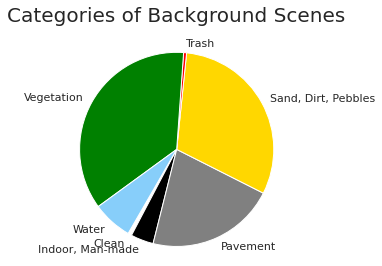

In [9]:
# Get scene cat names
scene_cats = dataset['scene_categories']
scene_name = []
for scene_cat in scene_cats:
    scene_name.append(scene_cat['name'])

nr_scenes = len(scene_cats)
scene_cat_histogram = np.zeros(nr_scenes,dtype=int)

for scene_ann in dataset['scene_annotations']:    
    scene_ann_ids = scene_ann['background_ids']
    for scene_ann_id in scene_ann_ids:
        if scene_ann_id<len(scene_cats):
            scene_cat_histogram[scene_ann_id]+=1

# Convert to DataFrame
df = pd.DataFrame({'scene_cats': scene_cats, 'nr_annotations': scene_cat_histogram})
 
# Plot
colors = ['white','black','gray', 'gold', 'red','green','lightskyblue']
plt.pie(scene_cat_histogram, labels=scene_name, colors = colors,
      shadow=False, startangle=-120)
plt.title("Categories of Background Scenes",pad=20,fontdict={'fontsize':20,'fontweight':12})
 
plt.axis('equal')
plt.show()

## 2. Visualize dataset graph

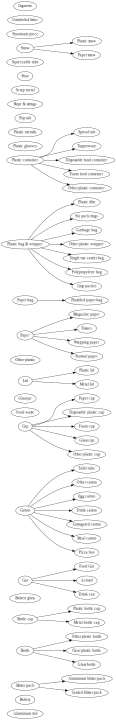

In [10]:
from graphviz import Digraph
# Note: graphviz may require more than pip installation due to path issue: e.g. brew install graphviz for mac

#g = Digraph('G', filename='hello.gv')
dot = Digraph('Dataset graph', filename='asd.gv')
dot.attr(rankdir='LR', size='8,10')

for cat_it in categories:
    dot.node(cat_it['name'])
    if cat_it['name']==cat_it['supercategory']:
        dot.node(cat_it['supercategory'])
    else:
        dot.edge(cat_it['supercategory'], cat_it['name'])
dot
# Uncomment next line to print pdf
# dot.view()

## 3. Visualize Annotated Images
For simplicity, to select and show the dataset images with the respective masks, we make use of the COCO API. The script below shows how to load and visualize an image with all its annotations.

Unfortunately, several python libraries do not take into account the EXIF orientation tag, thus we have to explicitly rotate the images. Alternatively you can use instead OpenCV.

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!
batch_15/000000.jpg


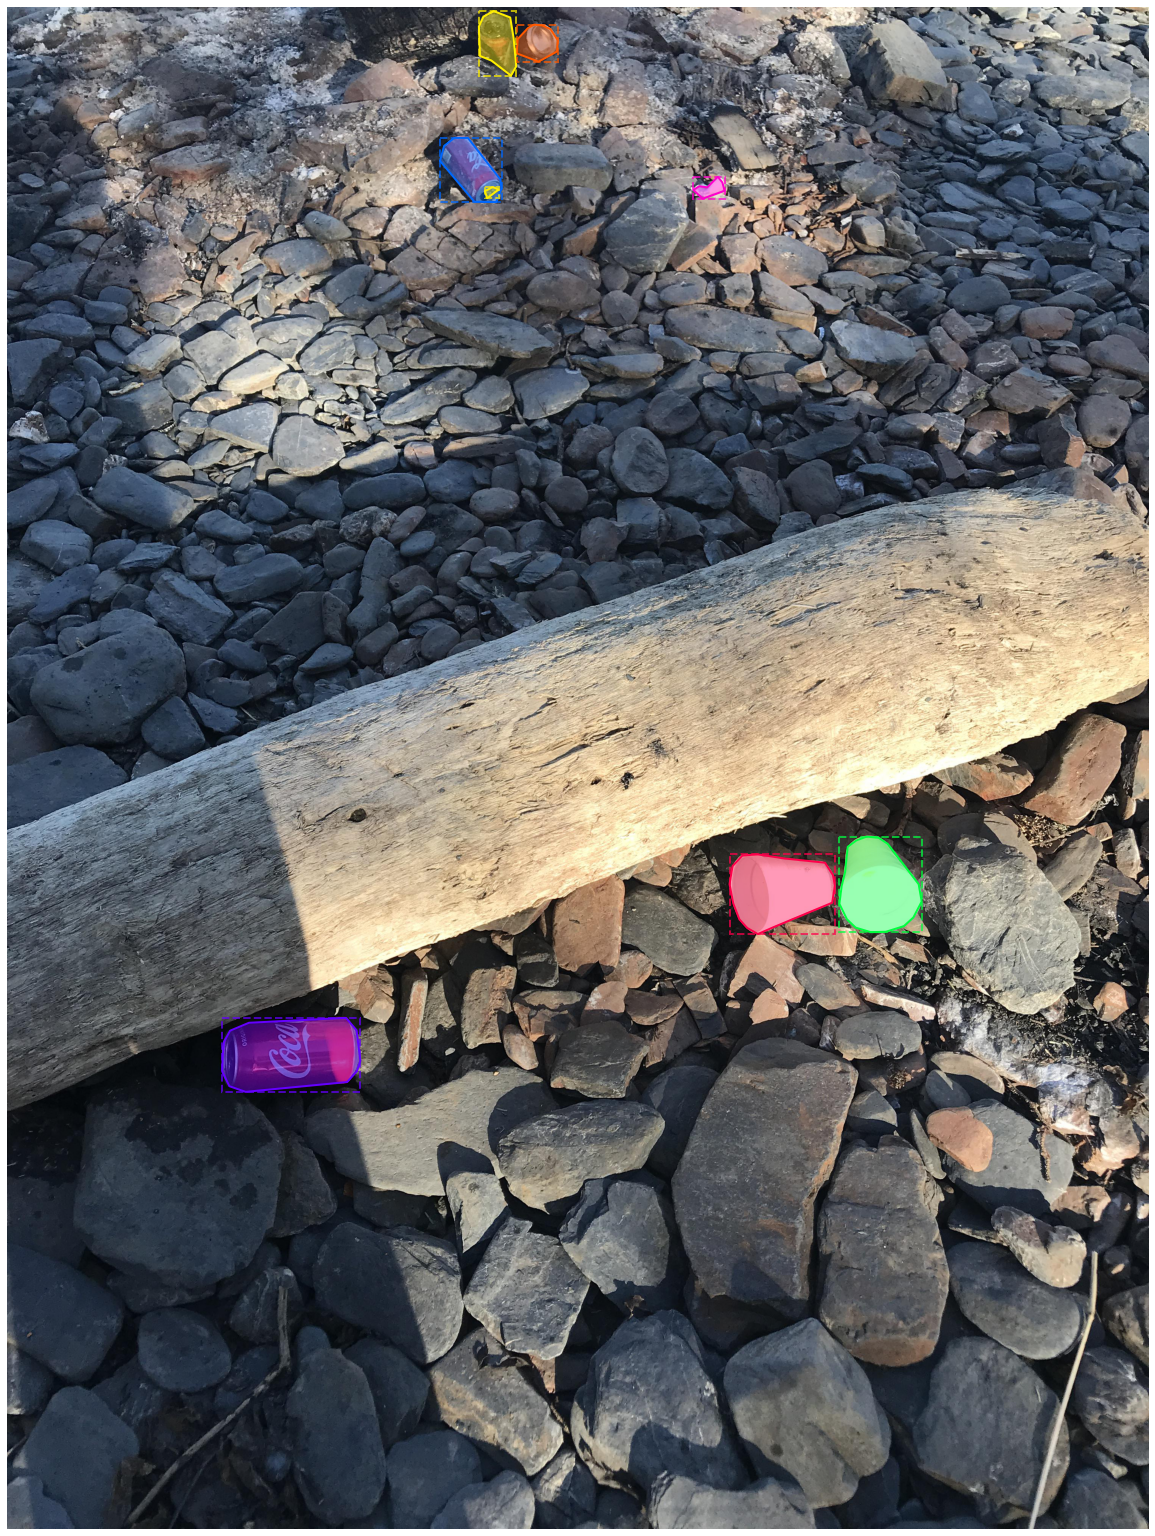

In [11]:
from PIL import Image, ExifTags
from pycocotools.coco import COCO
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
import colorsys
import random
import pylab

# User settings
image_filepath = 'batch_15/000000.jpg'
pylab.rcParams['figure.figsize'] = (28,28)
####################

# Obtain Exif orientation tag code
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break

# Loads dataset as a coco object
coco = COCO(anns_file_path)

# Find image id
img_id = -1
for img in imgs:
    if img['file_name'] == image_filepath:
        img_id = img['id']
        break

# Show image and corresponding annotations
if img_id == -1:
    print('Incorrect file name')
else:

    # Load image
    print(image_filepath)
    I = Image.open(dataset_path + '/' + image_filepath)

    # Load and process image metadata
    if I._getexif():
        exif = dict(I._getexif().items())
        # Rotate portrait and upside down images if necessary
        if orientation in exif:
            if exif[orientation] == 3:
                I = I.rotate(180,expand=True)
            if exif[orientation] == 6:
                I = I.rotate(270,expand=True)
            if exif[orientation] == 8:
                I = I.rotate(90,expand=True)

    # Show image
    fig,ax = plt.subplots(1)
    plt.axis('off')
    plt.imshow(I)

    # Load mask ids
    annIds = coco.getAnnIds(imgIds=img_id, catIds=[], iscrowd=None)
    anns_sel = coco.loadAnns(annIds)

    # Show annotations
    for ann in anns_sel:
        color = colorsys.hsv_to_rgb(np.random.random(),1,1)
        for seg in ann['segmentation']:
            poly = Polygon(np.array(seg).reshape((int(len(seg)/2), 2)))
            p = PatchCollection([poly], facecolor=color, edgecolors=color,linewidths=0, alpha=0.4)
            ax.add_collection(p)
            p = PatchCollection([poly], facecolor='none', edgecolors=color, linewidths=2)
            ax.add_collection(p)
        [x, y, w, h] = ann['bbox']
        rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                         facecolor='none', alpha=0.7, linestyle = '--')
        ax.add_patch(rect)

    plt.show()

The script below shows how to filter images by either category or supercategory.

Go ahead and try different (super)categories searches by changing the category_name. Note that small objects may be hard to see.

In [ ]:
from PIL import Image, ExifTags
from pycocotools.coco import COCO
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
import colorsys
import random
import pylab

# User settings
nr_img_2_display = 10
category_name = 'Cigarette'        # Insert the name of one of the categories or super-categories above
pylab.rcParams['figure.figsize'] = (14,14)
####################

# Obtain Exif orientation tag code
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break

# Loads dataset as a coco object
coco = COCO(anns_file_path)

# Get image ids
imgIds = []
catIds = coco.getCatIds(catNms=[category_name])
if catIds:
    # Get all images containing an instance of the chosen category
    imgIds = coco.getImgIds(catIds=catIds)
else:
    # Get all images containing an instance of the chosen super category
    catIds = coco.getCatIds(supNms=[category_name])
    for catId in catIds:
        imgIds += (coco.getImgIds(catIds=catId))
    imgIds = list(set(imgIds))

nr_images_found = len(imgIds) 
print('Number of images found: ',nr_images_found)

# Select N random images
random.shuffle(imgIds)
imgs = coco.loadImgs(imgIds[0:min(nr_img_2_display,nr_images_found)])

for img in imgs:
    image_path = dataset_path + '/' + img['file_name']
    # Load image
    I = Image.open(image_path)
    
    # Load and process image metadata
    if I._getexif():
        exif = dict(I._getexif().items())
        # Rotate portrait and upside down images if necessary
        if orientation in exif:
            if exif[orientation] == 3:
                I = I.rotate(180,expand=True)
            if exif[orientation] == 6:
                I = I.rotate(270,expand=True)
            if exif[orientation] == 8:
                I = I.rotate(90,expand=True)
    
    # Show image
    fig,ax = plt.subplots(1)
    plt.axis('off')
    plt.imshow(I)

    # Load mask ids
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns_sel = coco.loadAnns(annIds)
    
    # Show annotations
    for ann in anns_sel:
        color = colorsys.hsv_to_rgb(np.random.random(),1,1)
        for seg in ann['segmentation']:
            poly = Polygon(np.array(seg).reshape((int(len(seg)/2), 2)))
            p = PatchCollection([poly], facecolor=color, edgecolors=color,linewidths=0, alpha=0.4)
            ax.add_collection(p)
            p = PatchCollection([poly], facecolor='none', edgecolors=color, linewidths=2)
            ax.add_collection(p)
        [x, y, w, h] = ann['bbox']
        rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                         facecolor='none', alpha=0.7, linestyle = '--')
        ax.add_patch(rect)

    plt.show()

In [ ]:
from PIL import Image, ExifTags
from pycocotools.coco import COCO
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
import colorsys
import random
import pylab

# User settings
nr_img_2_display = 10
category_name = 'Normal paper'    # Insert the name of one of the categories or super-categories above
pylab.rcParams['figure.figsize'] = (14,14)
####################

# Obtain Exif orientation tag code
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break

# Loads dataset as a coco object
coco = COCO(anns_file_path)

# Get image ids
imgIds = []
catIds = coco.getCatIds(catNms=[category_name])
if catIds:
    # Get all images containing an instance of the chosen category
    imgIds = coco.getImgIds(catIds=catIds)
else:
    # Get all images containing an instance of the chosen super category
    catIds = coco.getCatIds(supNms=[category_name])
    for catId in catIds:
        imgIds += (coco.getImgIds(catIds=catId))
    imgIds = list(set(imgIds))

nr_images_found = len(imgIds) 
print('Number of images found: ',nr_images_found)

# Select N random images
random.shuffle(imgIds)
imgs = coco.loadImgs(imgIds[0:min(nr_img_2_display,nr_images_found)])

for img in imgs:
    image_path = dataset_path + '/' + img['file_name']
    # Load image
    I = Image.open(image_path)
    
    # Load and process image metadata
    if I._getexif():
        exif = dict(I._getexif().items())
        # Rotate portrait and upside down images if necessary
        if orientation in exif:
            if exif[orientation] == 3:
                I = I.rotate(180,expand=True)
            if exif[orientation] == 6:
                I = I.rotate(270,expand=True)
            if exif[orientation] == 8:
                I = I.rotate(90,expand=True)
    
    # Show image
    fig,ax = plt.subplots(1)
    plt.axis('off')
    plt.imshow(I)

    # Load mask ids
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns_sel = coco.loadAnns(annIds)
    
    # Show annotations
    for ann in anns_sel:
        color = colorsys.hsv_to_rgb(np.random.random(),1,1)
        for seg in ann['segmentation']:
            poly = Polygon(np.array(seg).reshape((int(len(seg)/2), 2)))
            p = PatchCollection([poly], facecolor=color, edgecolors=color,linewidths=0, alpha=0.4)
            ax.add_collection(p)
            p = PatchCollection([poly], facecolor='none', edgecolors=color, linewidths=2)
            ax.add_collection(p)
        [x, y, w, h] = ann['bbox']
        rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                         facecolor='none', alpha=0.7, linestyle = '--')
        ax.add_patch(rect)

    plt.show() 